#Лабораторная работа №1: Иерархическая кластеризация


In [87]:
#Импортируем библиотеки
import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

import os

In [89]:
#Активируем методы иерархического кластерного анализа
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [180]:
#Загружаем данные
data = './Econom_Cities_data.csv'
df = pd.read_csv(data, sep=';', decimal=',',  index_col='City')
df.head(15)

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


In [181]:
df

,Work,Price,Salary
City,,,
Amsterdam,1714,65.6,49.0
Athens,1792,53.8,30.4
Bogota,2152,37.9,11.5
Bombay,2052,30.3,5.3
Brussels,1708,73.8,50.5
Buenos_Aires,1971,56.1,12.5
Cairo,-9999,37.1,-9999.0
Caracas,2041,61.0,10.9
Chicago,1924,73.9,61.9


Можно заметить, что данные находятся в разных диапозонах, поэтому их надо стандартизировать. В качестве стандартизации выберем метод z-нормализации.

In [182]:
std = preprocessing.StandardScaler()
std.fit(df)
std_df = std.transform(df)
std_df = pd.DataFrame(std_df, index = df.index, columns = df.columns)
std_df.head(10)

,Work,Price,Salary
City,,,
Amsterdam,0.138269,-0.151250,0.213212
Athens,0.171046,-0.698647,0.203941
Bogota,0.322325,-1.436242,0.194519
Bombay,0.280303,-1.788804,0.191429
Brussels,0.135748,0.229145,0.213960
Buenos_Aires,0.246266,-0.591951,0.195018
Cairo,-4.783750,-1.473354,-4.795489
Caracas,0.275681,-0.364642,0.194220
Chicago,0.226515,0.233784,0.219643


Для иерархической кластеризации используем метод ```linkage```, с параметрами ```ward``` (метод вычеслени растояния между кластерами) и ```euclidean``` (метод для вычисления расстояния между объектами)

In [183]:
link = linkage(std_df, 'ward', 'euclidean')

В объекте ```link```  хранится история объединения кластеров. Это матрица numpy ```(n-1) x 4```, где ```n``` -- число наблюдений. Каждая строка матрицы описывает слияние очередной пары кластеров с номерами ```link[i, 0]``` и ```link[i, 1]```. Новому кластеру присваивается номер ```n + i```. Столбец ```link[i, 2]``` содержит расстояние между объединяемыми кластерами, а ```link[i, 3]``` -- объем нового кластера.

In [184]:
link.shape

(47, 4)

In [125]:
# Проверим содержимое link
link[:15]

array([[2.80000000e+01, 3.50000000e+01, 2.25040715e-02, 2.00000000e+00],
       [4.00000000e+00, 1.20000000e+01, 4.09006083e-02, 2.00000000e+00],
       [1.10000000e+01, 4.60000000e+01, 4.35229017e-02, 2.00000000e+00],
       [2.40000000e+01, 4.10000000e+01, 4.52682803e-02, 2.00000000e+00],
       [3.20000000e+01, 3.70000000e+01, 4.89408315e-02, 2.00000000e+00],
       [2.00000000e+01, 3.60000000e+01, 5.34862404e-02, 2.00000000e+00],
       [1.80000000e+01, 2.70000000e+01, 6.09939864e-02, 2.00000000e+00],
       [8.00000000e+00, 2.90000000e+01, 6.90517526e-02, 2.00000000e+00],
       [1.60000000e+01, 4.50000000e+01, 8.76629248e-02, 2.00000000e+00],
       [3.40000000e+01, 5.40000000e+01, 9.31657165e-02, 3.00000000e+00],
       [1.40000000e+01, 3.30000000e+01, 9.49567062e-02, 2.00000000e+00],
       [2.20000000e+01, 3.10000000e+01, 9.62263004e-02, 2.00000000e+00],
       [5.00000000e+00, 2.10000000e+01, 9.63929653e-02, 2.00000000e+00],
       [3.00000000e+01, 5.30000000e+01, 1.00789692e

Построим дендрограмму по формуле ```h = 0.7*max(link[:,2])```

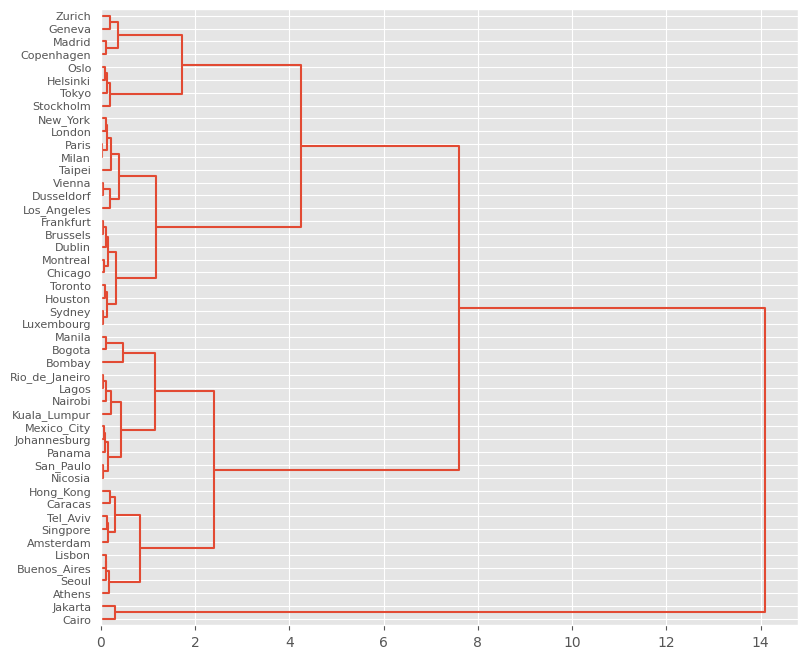

In [185]:
fig = plt.figure(figsize=(9,8))
dn = dendrogram(link,
                labels = df.index.tolist(),
                color_threshold = -1,
                orientation = "right")

По дендрограмме видены выбросы у Jakarya и Cairo, уберем их.

In [200]:
clean_df = df.drop(['Jakarta', 'Cairo'])
#Стандартизируем
std = preprocessing.StandardScaler()
std.fit(clean_df)
std_df = std.transform(clean_df)
std_df = pd.DataFrame(std_df, index = clean_df.index, columns = clean_df.columns)

Посмотрим на дендрограмму без выбросов.

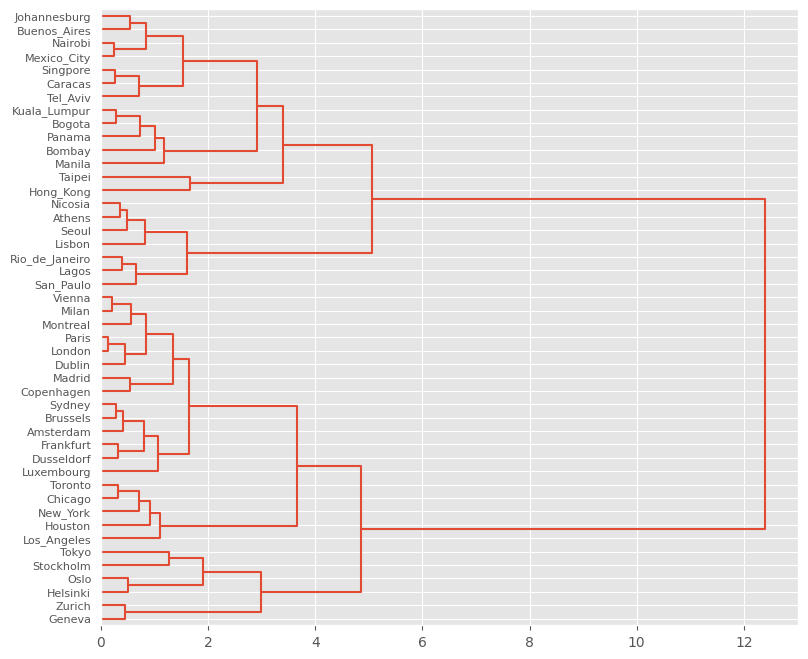

In [202]:
link = linkage(std_df, 'ward', 'euclidean')
fig = plt.figure(figsize=(9,8))
dn = dendrogram(link,
                labels = clean_df.index.tolist(),
                color_threshold = -1,
                orientation = "right")

Посмотрев на очищенную дендрограмму, можно выделить 4 кластера. Чтобы убедиться в сказанном, построим, для точного определения количества кластеров, график ```каменистая осыпь```.

Для построения такого графика будем использовать второй стобец массива ```link```

In [188]:
dist = link[:, 2]
dist

array([0.02250407, 0.04090061, 0.0435229 , 0.04526828, 0.04894083,
       0.05348624, 0.06099399, 0.06905175, 0.08766292, 0.09316572,
       0.09495671, 0.0962263 , 0.09639297, 0.10078969, 0.1067358 ,
       0.10899723, 0.11579851, 0.11618945, 0.12606955, 0.12810793,
       0.13511681, 0.13676048, 0.15211972, 0.15288982, 0.15400286,
       0.17700605, 0.18109863, 0.19032575, 0.19141994, 0.19993961,
       0.20485249, 0.20693019, 0.30476099, 0.31439178, 0.36789466,
       0.38797851, 0.42866291, 0.46964893, 0.83287298, 1.13789685,
       1.17663461, 1.72650852, 2.40039581, 4.2381313 , 7.59077875])

Text(0, 0.5, 'Расстояние')

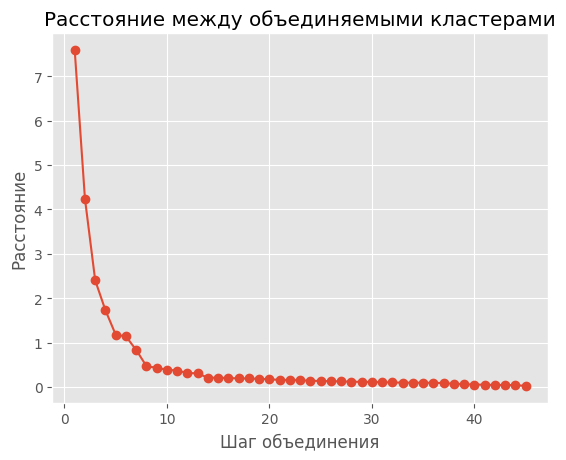

In [189]:
dist_rev = dist[::-1]
idxs = range(1, len(dist) + 1)
plt.plot(idxs, dist_rev, marker='o')
plt.title('Расстояние между объединяемыми кластерами')
plt.xlabel('Шаг объединения')
plt.ylabel('Расстояние')

Из графика приведенного выше мы можем видеть три локтя(примерное нахождение точки локтя по x: 5, 8, 13), то есть четыре кластера.

Для сравнения кластеров добавить еще столбец ```cluster```, в котором будет содержаться номер кластера объекта.

In [203]:
clean_df['cluster'] = fcluster(link, 4, criterion='maxclust')
clean_df.groupby('cluster').mean()

,Work,Price,Salary
cluster,,,
1,1780.500000,108.550000,71.300000
2,1792.000000,77.526316,55.157895
3,1798.857143,50.942857,19.214286
4,2082.357143,53.121429,14.914286


##Вывод
1. В первом кластере собрались города, где люди меньше работают больше зарабатывают, но и цены на жизнь у них выше всех;
2. Во втором кластере люди работают немного больше, зарплаты у них не сильно ниже первого кластера, но что приятно и цены на жизнь тоже ниже;
3. В третьем кластере люди все еще работают примерно так же как и в выше указанных кластерах, но заработная плата у них значительно ниже, ценны на услуги по сравнению с первым кластером в два раза ниже,а ЗП в три раза;
4. В четвертый кластер вошли города, в которых люди работают больше всех, получают ЗП меньше первого кластера в 5 раз, цены на услуги меньше всего в 2 раза.